In [1]:
import numpy as np
import corner
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import integrate
from scipy.stats import multivariate_t
import matplotlib.colors as mcolors


In [2]:
def banana_unNormalized(x):
    c1=1.0
    c2=20.0

    
    return np.exp(-(c1-x[0])**2 - c2*(x[1]-x[0]**2)**2)

In [3]:
def banana_2dInput_unNormalized(x1,x2):
    return banana_unNormalized([x1,x2])

In [4]:
bounds_new=[[-10,10],
            [-10,10]]

In [191]:

# Perform the double integration
Normalization_banana, error = integrate.dblquad(banana_2dInput_unNormalized, bounds_new[0][0], bounds_new[0][1], bounds_new[1][0], bounds_new[1][1],
    epsabs=1e-10,
    epsrel=1e-10)

In [192]:
Normalization_banana

0.6870602552872778

In [193]:
def banana(x):
    c1=1.0
    c2=20.0

    
    return np.exp(-(c1-x[0])**2 - c2*(x[1]-x[0]**2)**2)/Normalization_banana

In [194]:

# Define the grid of points
x0 = np.linspace(-2, 3, 400)
y0 = np.linspace(-1, 6, 400)
X, Y = np.meshgrid(x0, y0)

pos = np.dstack((X, Y))
# pos = np.dstack((x0, y0))

In [195]:
# Compute the probability density function (PDF) of the multivariate t-distribution for each point
Z = np.zeros_like(X)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Z[i, j] = banana(pos[i, j])

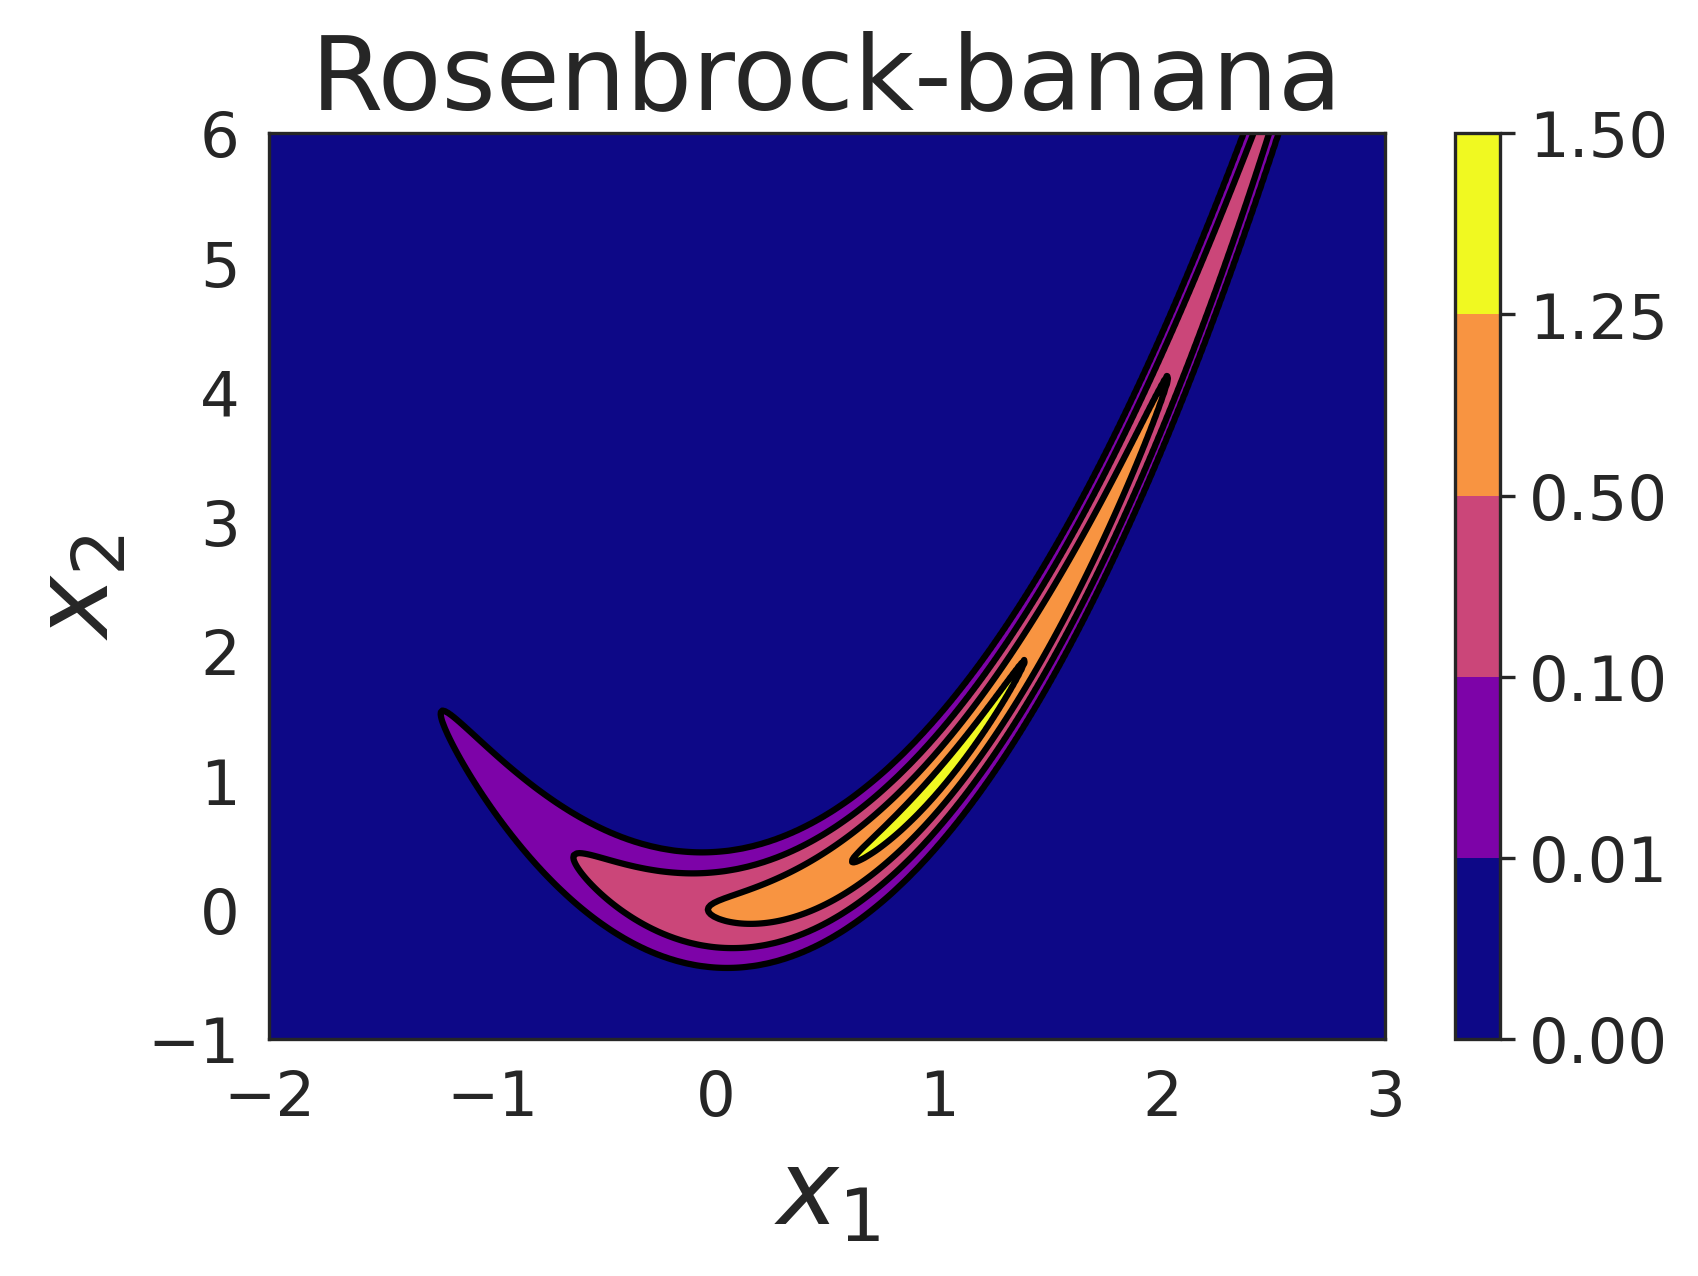

In [196]:

contour_levels = [0,0.01,0.1,0.5,1.25,1.5]

contour_levels2 = [0.01,0.1,0.5,1.25,1.5]

plt.rc('xtick', labelsize=15)    
plt.rc('ytick', labelsize=15)

# Define a colormap
cmap = plt.get_cmap('plasma')
# cmap = plt.get_cmap('viridis')

# cmap = plt.get_cmap('gnuplot2')


# Create a normalization object using BoundaryNorm
norm = mcolors.BoundaryNorm(boundaries=contour_levels, ncolors=cmap.N)


sns.set_style("white")
plt.figure(figsize=(6,4),dpi=300)
contour_filled = plt.contourf(X, Y, Z, cmap=cmap,levels=contour_levels,norm=norm)  # 'viridis' is another colormap


cbar = plt.colorbar(contour_filled)






plt.contour(X, Y, Z,levels=contour_levels2,colors='black')
plt.title('Rosenbrock-banana',fontsize=25)
plt.xlabel(r'$x_1$',fontsize=25)

plt.ylabel(r'$x_2$',fontsize=25)




plt.show()



In [197]:
def MCMCSampling(distr,sigma,num_iterations):

    #thermalizing
    burn_samples=10000
    # Set the initial state of the chain
    x_current, y_current = 1.0, 1.0

    # Set the standard deviation of the proposal distribution
#     sigma = 1.0

    # Set the number of iterations to run

#     num_iterations = 10000

    # Create empty lists to store the samples
    x_samples = []
    y_samples = []

    
    acceptance_times=0
    
    # Run the Metropolis-Hastings algorithm
    for i in range(burn_samples):
        # Propose a new state for the chain
        x_proposed = np.random.normal(x_current, sigma)
        y_proposed = np.random.normal(y_current, sigma)

        # Calculate the acceptance probability
        acceptance_prob = min(1, distr(x_proposed, y_proposed) / distr(x_current, y_current))

        # Accept or reject the proposal
        if np.random.uniform() < acceptance_prob:
            x_current, y_current = x_proposed, y_proposed
#             acceptance_times=acceptance_times+1

      
        
        
        
        
    for i in range(num_iterations):
        # Propose a new state for the chain
        x_proposed = np.random.normal(x_current, sigma)
        y_proposed = np.random.normal(y_current, sigma)

        # Calculate the acceptance probability
        acceptance_prob = min(1, distr(x_proposed, y_proposed) / distr(x_current, y_current))

        # Accept or reject the proposal
        if np.random.uniform() < acceptance_prob:
            x_current, y_current = x_proposed, y_proposed
            acceptance_times=acceptance_times+1

        # Store the current state as a sample
        x_samples.append(x_current)
        y_samples.append(y_current)   
        
        
#     skips=20 
#     obs_val=[]   
#     for j in range(int(len(x_samples)/skips)):
#         obs_val.append(R2(x_samples[j],y_samples[j]))
    
    
    
    
    
    print(acceptance_times/num_iterations*100,"%")
    
    return(np.array([x_samples,y_samples]),acceptance_times/num_iterations*100)

In [198]:
nf_100k=np.loadtxt("Banananfsamples.txt")

mcmc_100k_raw=np.loadtxt("Bananatraindata_c100_n100000.txt")

In [199]:
mcmc_100k=np.array([mcmc_100k_raw.T[0],mcmc_100k_raw.T[1]]).T

In [200]:
x1_grid=np.linspace(-10, 10, 200)
x2_grid=np.linspace(-2, 15, 200)

In [201]:
hx1vals=[]
hx2vals=[]

In [202]:
for i in range(len(x1_grid)):




    def banana1D(x2):
        c1=1.0
        c2=20.0
        x1=x1_grid[i]

        return np.exp(-(c1-x1)**2 - c2*(x2-x1**2)**2)/Normalization_banana

    hx1vals.append(integrate.quad(banana1D,bounds_new[1][0], bounds_new[1][1])[0])

In [203]:
for i in range(len(x2_grid)):

    def banana1D(x1):
        c1=1.0
        c2=20.0
#         x1=x1_grid[i]
        x2=x2_grid[i]
        return np.exp(-(c1-x1)**2 - c2*(x2-x1**2)**2)/Normalization_banana

#     hx2vals.append(integrate.quad(banana1D,bounds_new[0][0], bounds_new[0][1],epsabs=1e-14, epsrel=1e-14,limit=10000)[0])
    hx2vals.append(integrate.quadrature(banana1D,bounds_new[0][0], bounds_new[0][1],rtol=1e-13,tol=1e-13,miniter=3000,maxiter=3500)[0])

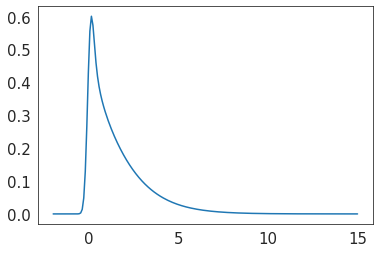

In [204]:
plt.plot(x2_grid,hx2vals)

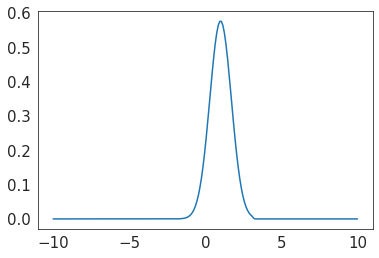

In [205]:
plt.plot(x1_grid,hx1vals)

In [206]:
hx1vals=np.array(hx1vals)
hx2vals=np.array(hx2vals)

In [207]:
combined_data = np.vstack((nf_100k, mcmc_100k))

In [246]:
bins_total=[70,120]

In [247]:
bins = [np.histogram_bin_edges(combined_data[:, i], bins=bins_total[i]) for i in range(combined_data.shape[1])]

In [248]:
w0=(bins[0][1]-bins[0][0])
w1=(bins[1][1]-bins[1][0])


In [249]:
bins[0] = np.insert(bins[0], 0, bins[0][0]-w0)
bins[1] = np.insert(bins[1], 0, bins[1][0]-w1)

In [250]:
bins[0] = np.insert(bins[0], 0, bins[0][0]-w0)
bins[1] = np.insert(bins[1], 0, bins[1][0]-w1)

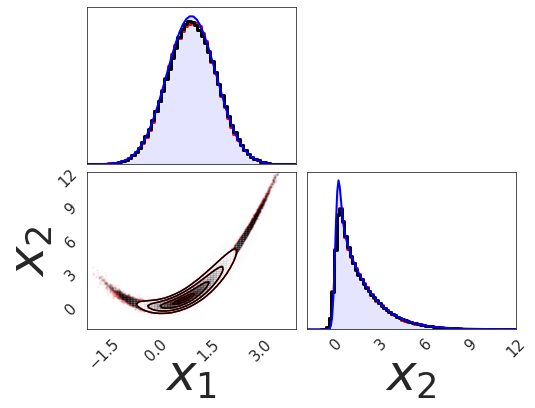

In [253]:
dim=len(nf_100k[0])


plt.rc('xtick', labelsize=15)    
plt.rc('ytick', labelsize=15)
    
figure = corner.corner(nf_100k,density=True,
    labels=['$x_1$','$x_2$'],
    labelpad=0, color='r',
                       weights=np.full(len(nf_100k),(len(mcmc_100k))/(len(nf_100k))),
                       
             bins=bins,
    label_kwargs={"fontsize":30},
                      hist_kwargs= {"linewidth":3},
    quantiles=None,
#                        truths=[x1_mean,x2_mean], truth_color='r'
                       
    smooth=(1.7)
                       ,
    smooth1d=1.0, range=[[-2,4],[-2,12]]
                      )




corner.corner(mcmc_100k,density=True,fig=figure,
    labels=['$x_1$','$x_2$'], color='k',
                   
#                        weights=np.full(len(mcmc_100k),(len(nf_100k))/(len(mcmc_100k))),
                       
             bins=bins,
#               bins=40,
                       
    label_kwargs={"fontsize":50},
                      hist_kwargs= {"linewidth":3},
    quantiles=None,
#                        truths=alphaCentralPrior, truth_color='g'
                       
    smooth=(1.7)
                       ,
    smooth1d=1.0,
             range=[[-2,4],[-2,12]]
                      )





axes = np.array(figure.axes).reshape((dim, dim))


ax=axes[0,0]
ax.plot(x1_grid,100000*w0*hx1vals,color='b',linewidth=2)
ax.fill_between(x1_grid, 100000*w0*hx1vals, color='blue', alpha=0.1)





ax=axes[1,1]
ax.plot(x2_grid,100000*w1*hx2vals,color='b',linewidth=2)
ax.fill_between(x2_grid, 100000*w1*hx2vals, color='blue', alpha=0.1)

ax.xaxis.set_label_coords(0.5, -0.15)  
ax.set_ylim(0,11000)

ax=axes[1,0]
ax.xaxis.set_label_coords(0.5, -0.15) 
ax.yaxis.set_label_coords(-0.15, 0.5)







width = 8
height = 6
figure.set_size_inches(width, height)









